# Titanic - Predicting survival

## Alex Braithwaite

# Imports

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('seaborn-colorblind')
%matplotlib inline

RANDOM_STATE = 42

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [2]:
df_train = pd.read_csv('train.csv')
validation = pd.read_csv('test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
# Check data shape
df_train.shape

(891, 12)

In [63]:
# Check data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [64]:
# Check for missing values - Percentage of missing values
df_train.isnull().sum() * 100 / len(df_train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Impute missing values for Age

In [65]:
from sklearn.preprocessing import Imputer

imp_age=Imputer(missing_values='NaN', strategy='mean')
imp_age.fit(df_merged[['Age']])

df_train["Age"]=imp_age.transform(df_train[['Age']])

# Convert age to an integer
df_train['Age'] = df_train['Age'].astype(np.int64)
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [66]:
imp_age=Imputer(missing_values='NaN', strategy='mean')
imp_age.fit(validation[['Age']])

validation["Age"]=imp_age.transform(validation[['Age']])

# Convert age to an integer
validation['Age'] = validation['Age'].astype(np.int64)

### Convert categorical variables Sex and Embarked to numerical 

In [67]:
df_train['Cabin'].fillna('U', inplace = True)
df_train.head()
# Fill 2 missing embarked values
df_train['Embarked'].fillna(df_train['Embarked'].value_counts().index[0], inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [68]:
validation['Cabin'].fillna('U', inplace = True)
validation['Fare'].fillna(validation['Fare'].mean(), inplace = True)
validation.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [69]:
# Create dummy variables
embarked = pd.get_dummies(df_train['Embarked'])
sex = pd.get_dummies(df_train['Sex'])
#concat new Embarked and Sex columns
df = pd.concat([embarked, sex], axis = 1)
df_train = pd.concat([df_train, df], axis = 1)

In [70]:
# Create dummy variables
embarked = pd.get_dummies(validation['Embarked'])
sex = pd.get_dummies(validation['Sex'])
#concat new Embarked and Sex columns
df = pd.concat([embarked, sex], axis = 1)
validation = pd.concat([validation, df], axis = 1)

### Create a title column from the names column

In [71]:
title = []
for row in df_train['Name']:
    title.append(row[row.index(', ') + 1:row.index('.')].strip())
df_train['title'] = title

In [72]:
title = []
for row in validation['Name']:
    title.append(row[row.index(', ') + 1:row.index('.')].strip())
validation['title'] = title

In [73]:
# Sum of different titles
df_train['title'].value_counts().sum

<bound method Series.sum of Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
the Countess      1
Capt              1
Mme               1
Don               1
Ms                1
Jonkheer          1
Lady              1
Name: title, dtype: int64>

In [74]:
df_train['title'].loc[df_train['title'].str.contains('Miss|Mlle') == True] = "Miss"
df_train['title'].loc[df_train['title'].str.contains('Mrs|Mme|Ms') == True] = "Mrs"
df_train['title'].loc[df_train['title'].str.contains('Mr') == True] = "Mr"
df_train['title'].loc[df_train['title'].str.contains('Don|Lady|Sir|the Countess|Lady|Jonkheer') == True] = "Royalty"
df_train['title'].loc[df_train['title'].str.contains('Dr|Rev|Major|Col|Capt') == True] = "Officer"

df_train['title'].value_counts().sum

<bound method Series.sum of Mr         644
Miss       184
Master      40
Officer     18
Royalty      5
Name: title, dtype: int64>

In [75]:
validation['title'].loc[validation['title'].str.contains('Miss|Mlle') == True] = "Miss"
validation['title'].loc[validation['title'].str.contains('Mrs|Mme|Ms') == True] = "Mrs"
validation['title'].loc[validation['title'].str.contains('Mr') == True] = "Mr"
validation['title'].loc[validation['title'].str.contains('Don|Lady|Sir|the Countess|Lady|Jonkheer') == True] = "Royalty"
validation['title'].loc[validation['title'].str.contains('Dr|Rev|Major|Col|Capt') == True] = "Officer"

In [76]:
#Create dummy variable for title
title = pd.get_dummies(df_train['title'])
df_train = pd.concat([df_train, title], axis = 1)

In [77]:
title = pd.get_dummies(validation['title'])
validation = pd.concat([validation, title], axis = 1)

In [78]:
# map first letter of cabin to itself
df_train['Cabin'] = df_train['Cabin'].map(lambda x: x[0] + '_Cabin')

df_train['Cabin'].value_counts().sum

<bound method Series.sum of U_Cabin    687
C_Cabin     59
B_Cabin     47
D_Cabin     33
E_Cabin     32
A_Cabin     15
F_Cabin     13
G_Cabin      4
T_Cabin      1
Name: Cabin, dtype: int64>

In [79]:
# map first letter of cabin to itself
validation['Cabin'] = validation['Cabin'].map(lambda x: x[0] + '_Cabin')

In [80]:
# Cabin dummy variables
cabin = pd.get_dummies(df_train['Cabin'])
df_train = pd.concat([df_train, cabin], axis = 1)

In [81]:
cabin = pd.get_dummies(validation['Cabin'])
validation = pd.concat([validation, cabin], axis = 1)

In [82]:
# Some children travelled only with a nanny, therefore parch=0 for them. Set Parch to 1 assuming they travelled with a Nanny
df_train['Parch'].loc[(df_train['Age'] < 13) & (df_train['Parch'] == 0)] = 1

In [83]:
validation['Parch'].loc[(validation['Age'] < 13) & (validation['Parch'] == 0)] = 1

In [84]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Royalty,A_Cabin,B_Cabin,C_Cabin,D_Cabin,E_Cabin,F_Cabin,G_Cabin,T_Cabin,U_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,...,0,0,0,1,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,...,0,0,0,0,0,0,0,0,0,1


## Variable correlations

In [85]:
validation.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Officer,Royalty,A_Cabin,B_Cabin,C_Cabin,D_Cabin,E_Cabin,F_Cabin,G_Cabin,U_Cabin
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,U_Cabin,...,0,0,0,0,0,0,0,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,U_Cabin,...,0,0,0,0,0,0,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,U_Cabin,...,0,0,0,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,U_Cabin,...,0,0,0,0,0,0,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,U_Cabin,...,0,0,0,0,0,0,0,0,0,1


In [86]:
corr = df_train.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,...,Royalty,A_Cabin,B_Cabin,C_Cabin,D_Cabin,E_Cabin,F_Cabin,G_Cabin,T_Cabin,U_Cabin
PassengerId,1.000000,-0.005007,-0.035144,0.033741,-0.057527,-0.000038,0.012658,-0.001205,-0.033606,0.022204,...,0.031602,-0.003256,0.069552,-0.040957,0.022828,0.042351,-0.035772,-0.060049,-0.013814,-0.019919
Survived,-0.005007,1.000000,-0.338481,-0.067809,-0.035322,0.084009,0.257307,0.168240,0.003650,-0.149683,...,0.033391,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912
Pclass,-0.035144,-0.338481,1.000000,-0.335071,0.083081,0.021887,-0.549500,-0.243292,0.221009,0.074053,...,-0.117649,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,-0.052496,0.725541
Age,0.033741,-0.067809,-0.335071,1.000000,-0.232743,-0.183127,0.093856,0.030786,-0.021164,-0.013652,...,0.069631,0.121961,0.093580,0.113782,0.133894,0.118522,-0.077058,-0.076384,0.039832,-0.236172
SibSp,-0.057527,-0.035322,0.083081,-0.232743,1.000000,0.413868,0.159651,-0.059528,-0.026354,0.068734,...,-0.008384,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460
Parch,-0.000038,0.084009,0.021887,-0.183127,0.413868,1.000000,0.214577,-0.005957,-0.082464,0.057113,...,-0.035876,-0.040848,0.055478,0.029605,-0.019933,-0.017350,0.023171,0.072064,-0.016008,-0.034689
Fare,0.012658,0.257307,-0.549500,0.093856,0.159651,0.214577,1.000000,0.269335,-0.117216,-0.162184,...,0.015044,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075
C,-0.001205,0.168240,-0.243292,0.030786,-0.059528,-0.005957,0.269335,1.000000,-0.148258,-0.782742,...,0.079020,0.093040,0.168642,0.113952,0.102977,-0.015939,-0.034726,-0.032371,-0.016158,-0.208528
Q,-0.033606,0.003650,0.221009,-0.021164,-0.026354,-0.082464,-0.117216,-0.148258,1.000000,-0.499421,...,-0.023105,-0.040246,-0.072579,-0.049776,-0.060318,-0.037897,-0.004113,-0.020654,-0.010310,0.129572
S,0.022204,-0.149683,0.074053,-0.013652,0.068734,0.057113,-0.162184,-0.782742,-0.499421,1.000000,...,-0.054685,-0.056180,-0.102063,-0.068502,-0.052254,0.037812,0.033010,0.041356,0.020643,0.101139


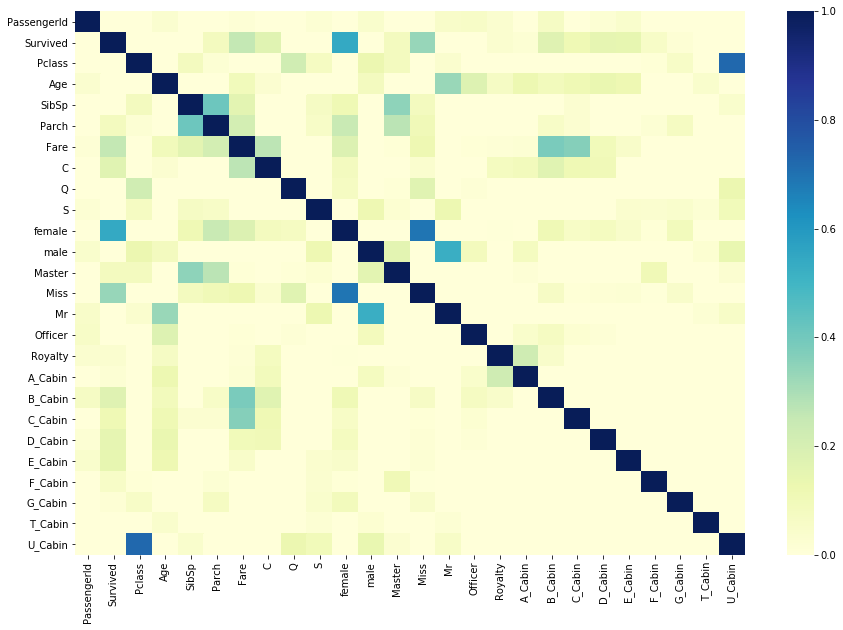

In [87]:
f, axs = plt.subplots(figsize=(15,10))
sns.heatmap(corr, vmin=0, vmax=1, cmap='YlGnBu', ax=axs)
plt.yticks(rotation=0)
plt.show()

# Model Build

In [120]:
from sklearn.model_selection import train_test_split

num_cols = list(df_train.select_dtypes(include=[np.number]).columns.values)
# Train and Test sets
X = df_train[num_cols].drop(['Survived','PassengerId','T_Cabin'], axis = 1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)

In [121]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,...,Officer,Royalty,A_Cabin,B_Cabin,C_Cabin,D_Cabin,E_Cabin,F_Cabin,G_Cabin,U_Cabin
0,3,22,1,0,7.2500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,38,1,0,71.2833,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3,26,0,0,7.9250,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35,1,0,53.1000,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
4,3,35,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Forming a pipeline - Model

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler # a transformer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier # an estimator

model = Pipeline([('scaler', StandardScaler()),
                 ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))
                 ])

In [123]:
# Fit and Score
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8283582089552238

## Fine tuning parameters

In [92]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 15, num = 10)]

#Create the random grid
random_grid = {'rfc__n_estimators': n_estimators,
               'rfc__max_features': max_features,
               'rfc__max_depth': max_depth}

rfc_random = RandomizedSearchCV(model, random_grid, n_iter=10, cv=3, random_state=RANDOM_STATE)

# Fit the random search model
rfc_random.fit(X_train, y_train)
best_param = rfc_random.best_params_
best_score = rfc_random.best_score_
best_estimator = rfc_random.best_estimator_
print(f'Best Params: {best_param}')
print(f'Best Score: {best_score}')
print(f'Best Score: {best_estimator}')

Best Params: {'rfc__n_estimators': 100, 'rfc__max_features': 'auto', 'rfc__max_depth': 11}
Best Score: 0.8298555377207063
Best Score: Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=11, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))])


## Model evaluation

Text(0.5,1,'RFC Classifier')

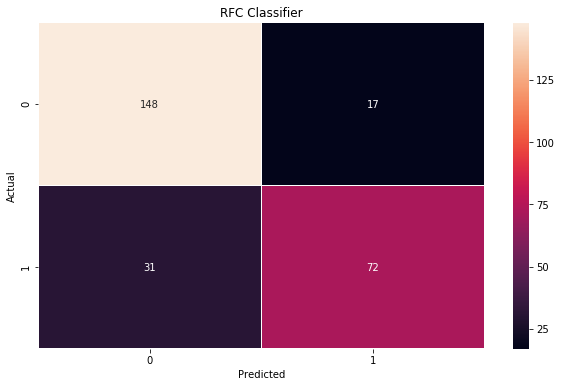

In [115]:
y_pred = rfc_random.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(confusion, annot=True, fmt="d", linewidths=0.5)
ax.set(xlabel='Predicted', ylabel='Actual')
ax.set_title('RFC Classifier')

In [110]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, auc, precision_recall_curve

# Compute fpr, tpr, thresholds and roc auc
probs = rfc_random.predict_proba(X_test)
y_score = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

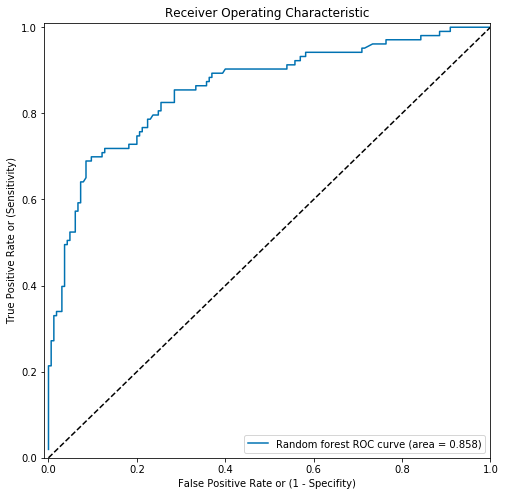

In [111]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label='Random forest ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [112]:
precision, recall, _ = precision_recall_curve(y_test, y_score)

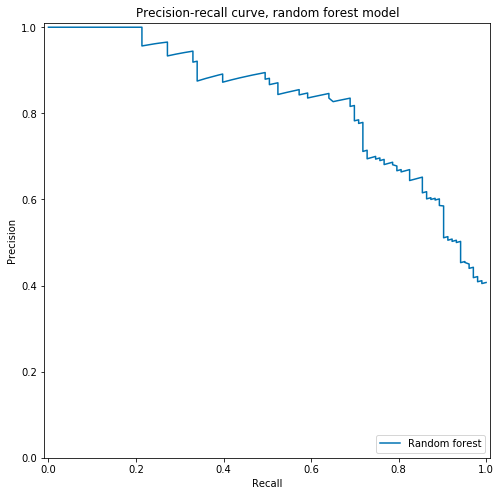

In [113]:
plt.figure(figsize=(8,8))
plt.plot(recall, precision, label='Random forest')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve, random forest model')
plt.legend(loc="lower right")

In [124]:
recall_score(y_test, y_pred)

0.6990291262135923

In [125]:
precision_score(y_test, y_pred)

0.8089887640449438

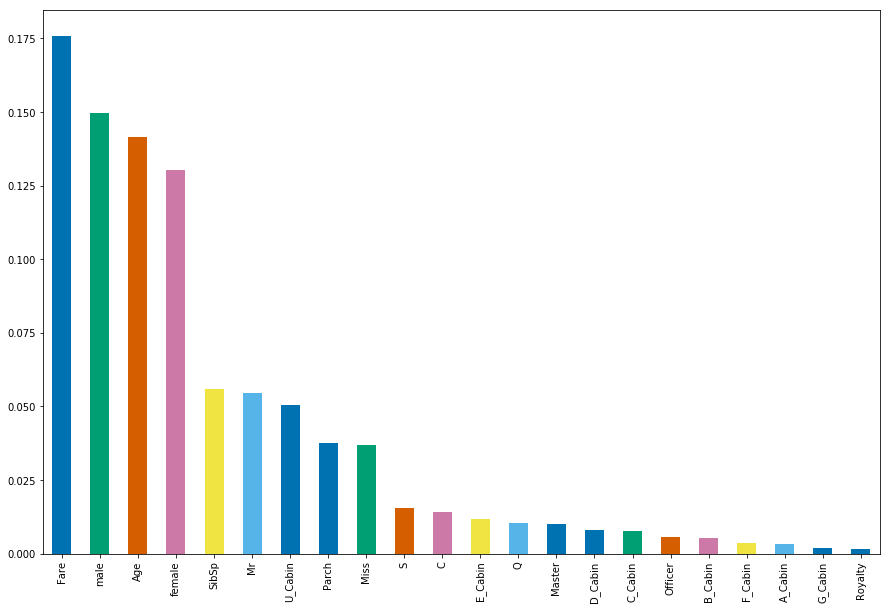

In [131]:
pd.Series(model.named_steps['rfc'].feature_importances_[1:], index=X.columns[1:]).sort_values(ascending=False).plot(kind='bar', figsize=(15,10))

In [127]:
num_cols = list(validation.select_dtypes(include=[np.number]).columns.values)
valid_X = validation[num_cols].drop(['PassengerId'], axis = 1)
valid_X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S', 'female',
       'male', 'Master', 'Miss', 'Mr', 'Officer', 'Royalty', 'A_Cabin',
       'B_Cabin', 'C_Cabin', 'D_Cabin', 'E_Cabin', 'F_Cabin', 'G_Cabin',
       'U_Cabin'],
      dtype='object')

In [ ]:
valid_pred = model.predict(valid_X)

In [ ]:
validation['Survived'] = valid_pred
validation['Survived'].value_counts().sum

In [ ]:
submission = validation[['PassengerId', 'Survived']]

In [ ]:
submission.to_csv('submission.csv', index=False)